In [4]:
# Setup
import numpy as np 
import pandas as pd 
import os
import pickle

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images/ml_modeling_images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def save_model(model, folder_path="models", file_name="untitled_model.sav"):
    pickle.dump(model, open(os.path.join(folder_path, file_name), 'wb'))

HEARTDISEASE_PATH = "dataset/afterpreprocessing"

heartdisease_data = pd.read_csv(os.path.join(HEARTDISEASE_PATH, f'heartDisease.csv'))
heartdisease_data.head()

,heartDisease,BMI,smoking,alcoholDrinking,stroke,physicalHealth,mentalHealth,diffWalking,sex,ageCategory,race,diabetic,physicalActivity,genHealth,sleepTime,asthma,kidneyDisease,skinCancer
0,2,1660,1,1,2,3,30,2,2,8,1,1,1,2,5,1,2,1
1,2,2034,2,1,1,88,88,2,2,13,1,3,1,2,7,2,2,2
2,2,2658,1,1,2,20,30,2,1,10,1,1,1,4,8,1,2,2
3,2,2421,2,1,2,88,88,2,2,12,1,3,2,3,6,2,2,1
4,2,2657,1,9,2,15,10,2,2,10,2,1,1,4,6,2,2,2


In [5]:
from sklearn.model_selection import train_test_split

features = heartdisease_data.drop(columns =['heartDisease'], axis = 1)

target = heartdisease_data['heartDisease']

x_train, x_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size = 0.3, random_state = 44)

x_train, y_train

(         BMI  smoking  alcoholDrinking  stroke  physicalHealth  mentalHealth   
 293404  3515        1                1       2               2            88  \
 263990  3712        2                1       2              88             1   
 251372  3193        1                1       2              88             5   
 156314  1958        2                1       2               3            10   
 324366  3328        2                1       2               1            14   
 ...      ...      ...              ...     ...             ...           ...   
 49723   4288        2                1       2               1            88   
 156845  2658        1                1       2              88            88   
 256753  3109        2                1       2              88            10   
 200099  1967        2                1       2               1            88   
 14100   3087        2                1       2               3            88   
 
         diffWalking  sex 

In [6]:
# Load models
MODELS_PATH = os.path.join(PROJECT_ROOT_DIR, "models")

DECISION_TREE_PATH = os.path.join(MODELS_PATH, 'decision_tree')
KNN_PATH = os.path.join(MODELS_PATH, 'knn')
LOGREG_PATH = os.path.join(MODELS_PATH, 'log_regression')
KMEANS_PATH = os.path.join(MODELS_PATH, 'kmeans')
RANDOMFOREST_PATH = os.path.join(MODELS_PATH, 'randomforest')

full_decisiontree_model = pickle.load(open(os.path.join(DECISION_TREE_PATH, "full_decision_tree_model.sav"), 'rb'))
reduced_decisiontree_model = pickle.load(open(os.path.join(DECISION_TREE_PATH, "reduced_decision_tree_model.sav"), 'rb'))
reduced_kmeans_model = pickle.load(open(os.path.join(KMEANS_PATH, "reduced_kmeans_model.sav"), 'rb'))
full_knn_model = pickle.load(open(os.path.join(KNN_PATH, "full_knn_model.sav"), 'rb'))
full_logregression_model = pickle.load(open(os.path.join(LOGREG_PATH, "full_logregression_model.sav"), 'rb'))
reduced_randomforest_model = pickle.load(open(os.path.join(RANDOMFOREST_PATH, "reduced_randomforest_model.sav"), 'rb'))

full_models_names = ["Full Decision Tree", "Full KNN", "Full Logistic Regression"]
reduced_models_names = ["Reduced Decision Tree", "Reduced KMeans", "Reduced Random Forest"]
full_models = [full_decisiontree_model, full_knn_model, full_logregression_model]
reduced_models = [reduced_decisiontree_model, reduced_kmeans_model, reduced_randomforest_model]

### Display Decision Tree Metrics

Decision Tree Metrics:

Number of Positive Predictions (Heart Disease): 976
Number of Negative Predictions (No Heart Disease): 104684
              precision    recall  f1-score   support

           1       0.56      0.06      0.11      9335
           2       0.92      1.00      0.95     96325

    accuracy                           0.91    105660
   macro avg       0.74      0.53      0.53    105660
weighted avg       0.88      0.91      0.88    105660

AUC: 0.816
Mean Absolute Error of the decision tree model is 0.08721370433465833
False Positive Rate [0.         0.34861147 0.50190501 0.51531793 0.52550221 0.62385674
 0.63659486 0.71137296 0.7255645  0.79396834 0.85268622 0.85697379
 0.85992214 0.89864521 0.90268362 0.94351414 0.94440696 0.96276148
 0.96509733 0.96578251 0.96947833 0.97402543 0.97431612 0.97532312
 0.98850766 0.99248378 0.99521412 0.99555671 0.99828705 0.99873345
 0.99879574 0.99952245 1.        ] True Postitive Rate [0.         0.03395822 0.08044992 0.08409213 0.0

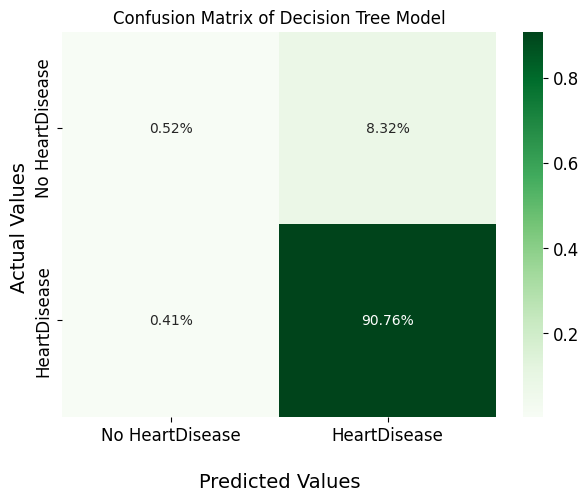

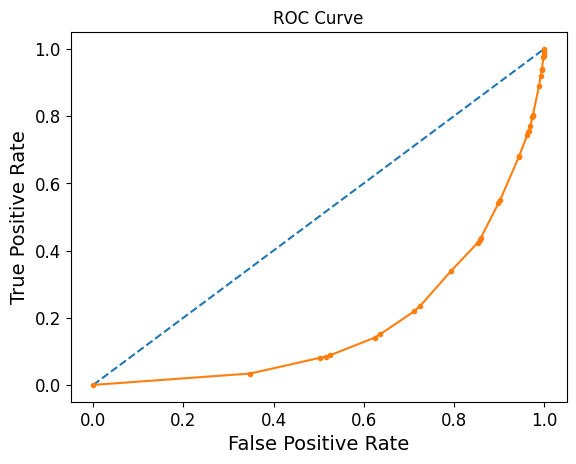

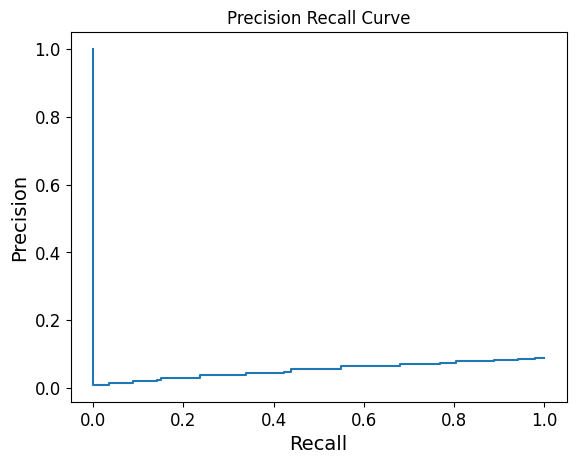

In [13]:
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix, mean_absolute_error, PrecisionRecallDisplay, precision_recall_curve
import seaborn as sns
#Predict the response for test dataset
def evaluate_DecisionTree():
    print("Decision Tree Metrics:\n")
    clf = full_decisiontree_model
    y_pred = clf.predict(x_test)
    print(f"Number of Positive Predictions (Heart Disease): {np.sum(y_pred == 1)}\nNumber of Negative Predictions (No Heart Disease): {np.sum(y_pred == 2)}")

    cm = confusion_matrix(y_test, y_pred)

    # evaluate 
    print(classification_report(y_test, y_pred))

    # predict probabilities
    probs = clf.predict_proba(x_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    auc = roc_auc_score(y_test, probs)

    print('AUC: %.3f' % auc)

    mae = mean_absolute_error(y_test, y_pred)
    print("Mean Absolute Error of the decision tree model is", mae)

    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_test, probs,
                                    pos_label=1)

    #print True and False Positive Rates 
    print("False Positive Rate", fpr, "True Postitive Rate", tpr)

    # plot confusion matrix
    plt.figure(figsize=(7,5))
    ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Greens')
    # labels
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ax.set_title('Confusion Matrix of Decision Tree Model')
    ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    plt.show()


    # plot ROC Curve
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    # labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    # show the plot
    plt.show()

    # Plot Precision Recall Display
    prec, recall, _ = precision_recall_curve(y_test, probs, pos_label=1)
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
    # labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    # show the plot
    plt.show()

evaluate_DecisionTree()

### Display Logistic Regression Metrics

Logistic Regression Metrics:

Number of Positive Predictions (Heart Disease): 1481
Number of Negative Predictions (No Heart Disease): 104179
              precision    recall  f1-score   support

           1       0.51      0.08      0.14      9335
           2       0.92      0.99      0.95     96325

    accuracy                           0.91    105660
   macro avg       0.71      0.54      0.55    105660
weighted avg       0.88      0.91      0.88    105660

AUC: 0.828
Mean Absolute Error of the logistic regression model is 0.08803710013250048
False Positive Rate [0.00000000e+00 1.03815209e-05 2.28393460e-04 ... 9.99979237e-01
 9.99979237e-01 1.00000000e+00] True Postitive Rate [0.         0.         0.         ... 0.99989288 1.         1.        ]


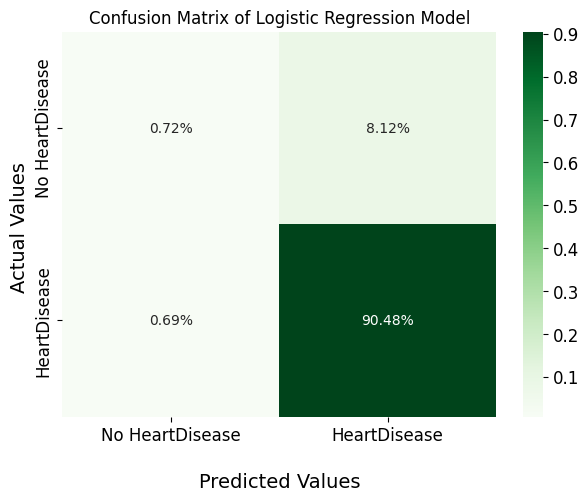

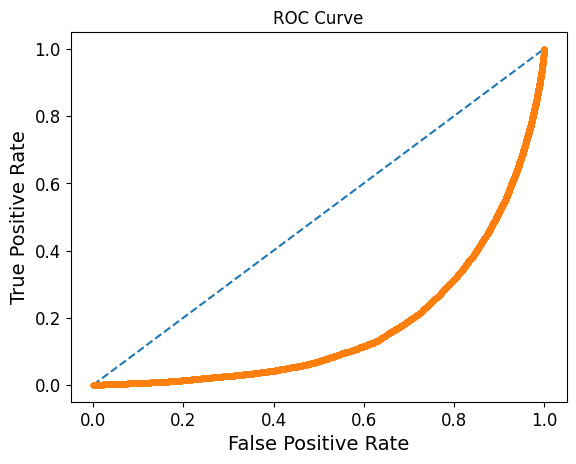

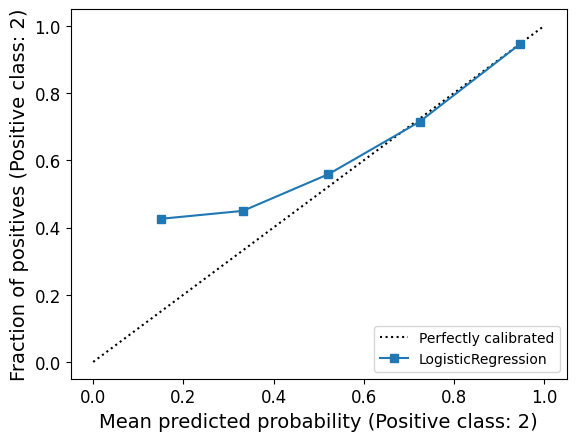

In [82]:
# Evaluate Logistic Regression model 
def evaluate_LogisticRegression():
    print("Logistic Regression Metrics:\n")
    clf = full_logregression_model
    y_pred = clf.predict(x_test)
    print(f"Number of Positive Predictions (Heart Disease): {np.sum(y_pred == 1)}\nNumber of Negative Predictions (No Heart Disease): {np.sum(y_pred == 2)}")

    cm = confusion_matrix(y_test, y_pred)

    # evaluate
    print(classification_report(y_test, y_pred))

    # predict probabilities
    probs = clf.predict_proba(x_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    auc = roc_auc_score(y_test, probs)

    print('AUC: %.3f' % auc)

    mae = mean_absolute_error(y_test, y_pred)
    print("Mean Absolute Error of the logistic regression model is", mae)

    # calculate roc curve
    fpr, tpr,thresholds = roc_curve(y_test, probs, pos_label=1)
    
    #print a couple of the True and False Positive Rates results
    print("False Positive Rate", fpr, "True Postitive Rate", tpr)

    # plot confusion matrix
    plt.figure(figsize=(7,5))
    ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Greens')
    # labels
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ax.set_title('Confusion Matrix of Logistic Regression Model')
    ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    plt.show()

    # plot ROC Curve
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    # labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    # show the plot
    plt.show()
    
    from sklearn.calibration import CalibrationDisplay
    disp = CalibrationDisplay.from_estimator(clf, x_test, y_test)
    plt.show()

evaluate_LogisticRegression()


### Display KNN Metrics

In [83]:
# Display KKN Metrics
def evaluate_KNN():
    print("KNN Metrics:\n")
    knn = full_knn_model
    y_pred = knn.predict(x_test)
    print(f"Number of Positive Predictions (Heart Disease): {np.sum(y_pred == 1)}\nNumber of Negative Predictions (No Heart Disease): {np.sum(y_pred == 2)}")

    # evaluate
    print(classification_report(y_test, y_pred))

    # predict probabilities
    probs = knn.predict_proba(x_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    auc = roc_auc_score(y_test, probs)

    print('AUC: %.3f' % auc)
    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label=1)

    #print True and False Positive Rates 
    print("False Positive Rate", fpr, "True Postitive Rate", tpr)

    # plot confusion matrix
    from sklearn.metrics import ConfusionMatrixDisplay
    cm = confusion_matrix(y_test, y_pred, labels=full_knn_model.classes_)
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels={'No Heart Disease', 'Heart Disease'}, display_title=('Confusion Matrix of KNN Model'))
    plt.title('Confusion Matrix of KNN Model')
    display.plot()
    plt.show()

    # plot ROC Curve
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    # labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    # show the plot
    plt.show()

    # Plot Precision Recall Display
    prec, recall, _ = precision_recall_curve(y_test, probs, pos_label=1)
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
    # labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    # show the plot
    plt.show()

evaluate_KNN()


KNN Metrics:



KeyboardInterrupt: 

### Display KMeans Metrics

In [ ]:
# Display KMeans Metrics
def evaluate_KMeans():
    print("KMeans Metrics:\n")
    clf = full_knn_model
    y_pred = clf.predict(x_test)
    print(f"Number of Positive Predictions (Heart Disease): {np.sum(y_pred == 1)}\nNumber of Negative Predictions (No Heart Disease): {np.sum(y_pred == 2)}")
    cm = confusion_matrix(y_test, y_pred)

    # evaluate
    print(classification_report(y_test, y_pred))

    # print True and False Positive Rates

    # predict probabilities
    probs = clf.predict_proba(x_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    auc = roc_auc_score(y_test, probs)

    print('AUC: %.3f' % auc)

    mae = mean_absolute_error(y_test, y_pred)
    print("Mean Absolute Error of the KNN model is", mae)

    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_test, probs,
                                    pos_label=1)
    
    #print a couple of the True and False Positive Rates results
    print("False Positive Rate", fpr, "True Postitive Rate", tpr)

    # plot confusion matrix
    plt.figure(figsize=(7,5))
    ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Greens')
    # labels
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ax.set_title('Confusion Matrix of KNN Model')
    ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    plt.show()

    # plot ROC Curve
    plt.plot([0, 1], [0, 1], linestyle='--')

    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    # labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    # show the plot
    plt.show()

    # Plot Precision Recall Display
    prec, recall, _ = precision_recall_curve(y_test, probs, pos_label=1)
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
    # labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    # show the plot
    plt.show()

evaluate_KMeans()

KMeans Metrics:

Number of Positive Predictions (Heart Disease): 1928
Number of Negative Predictions (No Heart Disease): 103732
              precision    recall  f1-score   support

           1       0.27      0.06      0.09      9335
           2       0.92      0.99      0.95     96325

    accuracy                           0.90    105660
   macro avg       0.59      0.52      0.52    105660
weighted avg       0.86      0.90      0.87    105660



KeyboardInterrupt: 

### Top Feature Selector

In [8]:
# Dropping irrelevant features
reduced_heartdisease_data = heartdisease_data.drop(columns=["genHealth", 
                                                    "sleepTime", 
                                                    "asthma",
                                                    "kidneyDisease",
                                                    "skinCancer"
                                                    ], axis=1)

In [9]:

red_features = reduced_heartdisease_data.drop(columns =['heartDisease'], axis = 1)

red_target = reduced_heartdisease_data['heartDisease']

red_x_train, red_x_test, red_y_train, red_y_test = train_test_split(red_features, red_target, shuffle = True, test_size = .2, random_state = 44)

### Display KMeans Metrics Using Reduced Feature

In [14]:
def evaluate_ReducedKMeans():
    print( "Reduced KMeans Metrics:\n")
    reduced_kmeans = reduced_kmeans_model
    y_pred = reduced_kmeans.predict(red_x_test)
    print(f"Number of Positive Predictions (Heart Disease): {np.sum(y_pred == 1)}\nNumber of Negative Predictions (No Heart Disease): {np.sum(y_pred == 2)}")
    cm = confusion_matrix(red_y_test, y_pred)

    # evaluate
    print(classification_report(red_y_test, y_pred))

    # predict probabilities
    probs = reduced_kmeans.predict_proba(red_x_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    auc = roc_auc_score(y_test, probs)

    print('AUC: %.3f' % auc)

    mae = mean_absolute_error(red_y_test, y_pred)
    print("Mean Absolute Error of the KNN model is", mae)

    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(red_y_test, probs, pos_label=1)
    
    #print a couple of the True and False Positive Rates results
    print("False Positive Rate", fpr, "True Postitive Rate", tpr)

    # plot confusion matrix
    plt.figure(figsize=(7,5))
    ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Greens')
    # labels
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ax.set_title('Confusion Matrix of KNN Model')
    ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    plt.show()

    # plot ROC Curve
    plt.plot([0, 1], [0, 1], linestyle='--')

    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    # labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    # show the plot
    plt.show()

    # Plot Precision Recall Display
    prec, recall, _ = precision_recall_curve(y_test, probs, pos_label=1)
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
    # labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    # show the plot
    plt.show()
    

evaluate_ReducedKMeans()


Reduced KMeans Metrics:



ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- heartDisease


### Display Random Forest Metrics Using Reduced Feature

Reduced Random Forest Metrics:

Number of Positive Predictions (Heart Disease): 2988
Number of Negative Predictions (No Heart Disease): 67452
              precision    recall  f1-score   support

           1       0.29      0.14      0.18      6271
           2       0.92      0.97      0.94     64169

    accuracy                           0.89     70440
   macro avg       0.60      0.55      0.56     70440
weighted avg       0.86      0.89      0.88     70440

AUC: 0.749
Mean Absolute Error of the KNN model is 0.10725440090857467
False Positive Rate [0.         0.46751547 0.46753105 ... 0.99992208 0.99996883 1.        ] True Postitive Rate [0.         0.12980386 0.12980386 ... 0.99984054 1.         1.        ]


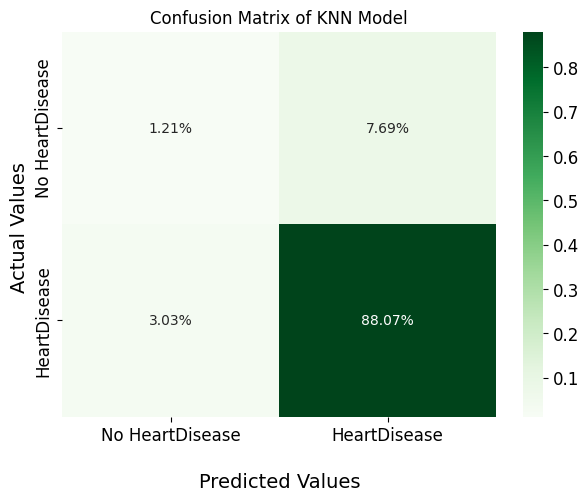

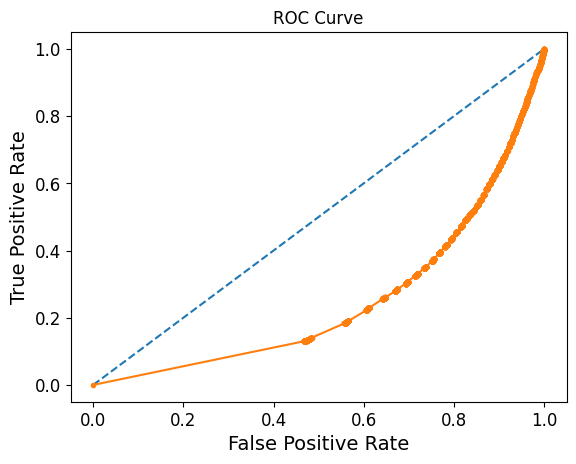

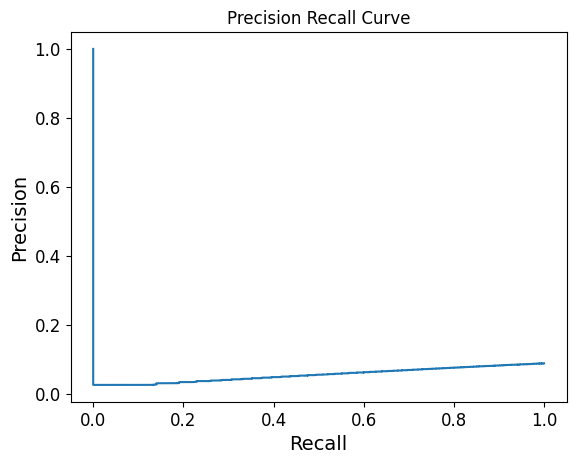

In [17]:
# Display Reduced Random Forest Metrics
def evaluate_ReducedRandomForest():
    print("Reduced Random Forest Metrics:\n")
    reduced_rf = reduced_randomforest_model
    y_pred = reduced_rf.predict(red_x_test)
    print(f"Number of Positive Predictions (Heart Disease): {np.sum(y_pred == 1)}\nNumber of Negative Predictions (No Heart Disease): {np.sum(y_pred == 2)}")
    cm = confusion_matrix(red_y_test, y_pred)

    # evaluate
    print(classification_report(red_y_test, y_pred))
    
    # predict probabilities
    probs = reduced_rf.predict_proba(red_x_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    auc = roc_auc_score(red_y_test, probs)

    print('AUC: %.3f' % auc)

    mae = mean_absolute_error(red_y_test, y_pred)
    print("Mean Absolute Error of the KNN model is", mae)

    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(red_y_test, probs,pos_label=1)
    
    #print a couple of the True and False Positive Rates results
    print("False Positive Rate", fpr, "True Postitive Rate", tpr)

    # plot confusion matrix
    plt.figure(figsize=(7,5))
    ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Greens')
    # labels
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ax.set_title('Confusion Matrix of KNN Model')
    ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    plt.show()

    # plot ROC Curve
    plt.plot([0, 1], [0, 1], linestyle='--')

    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    # labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    # show the plot
    plt.show()

    # Plot Precision Recall Display
    prec, recall, _ = precision_recall_curve(red_y_test, probs, pos_label=1)
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
    # labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    # show the plot
    plt.show()

evaluate_ReducedRandomForest()